# DevStack Solutions February 2022

Name :- SHUBHAM BHALERAO

Task-1 :- Make a Fake news detecting system based on a data set with the help of
machine learning.

Introduction :- This is project 1 a basic level project on data science.

Technology :- Python.

Dataset Link :- https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Or Reading The CSV File 

In [2]:
fake = pd.read_csv("news.csv")  # Reading the csv file using pandas.
fake

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Exploratory Data Analysis EDA on the dataset 

In [3]:
fake.head()  # Display the first five rows of the data from dataset.

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
fake.tail()  # Display the last five rows of the data from dataset.

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
# Here we are dropping the column named 'Unnamed: 0' from the data set as it is not necessary for data manipluation and prediction.
fake = fake.drop("Unnamed: 0", axis=1)
fake = fake.dropna() # Removing any missing or non existing values.
# Here we are replacing the Label column records for better model building i.e. FAKE by 0 and REAL by 1.
fake["label"].replace({"FAKE":"0","REAL":"1"},inplace=True)

In [6]:
fake.head()  # Display the first five rows of the data from dataset.

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [7]:
fake.shape # It shows the shape of the data variable in tuple format i.e. no. of rows and column.

(6335, 3)

In [8]:
# Print the summary of the dataframe like no. of rows and detailed information about the columns.
fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 198.0+ KB


In [9]:
# Shows the Statistical details of the column which has numerical values.
fake.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",1
freq,5,58,3171


In [10]:
# Checks whether the dataframe contains any null record or not and then gives the count of null records.
fake.isna().sum()

title    0
text     0
label    0
dtype: int64

# Data Visualization

<AxesSubplot:>

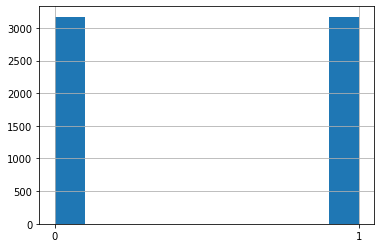

In [11]:
# Histogram gives the frequency distribution of the columns containing numerical data.
fake["label"].hist()

# Splitting the dataset as X = independent variable and y = dependent variable for Analysis and Prediction

In [12]:
X = fake.iloc[:,:-1]
y = fake.iloc[:,-1]

In [13]:
X.head()  # Display the first five rows of the data from dataset.

,title,text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [14]:
y.head()  # Display the first five rows of the data from dataset.

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: object

In [15]:
# We are converting the title and text in Dense/Condense metrics body i.e. in numerical form for prediction.
from sklearn.feature_extraction.text import CountVectorizer
cv_text = CountVectorizer(max_features=12000)
mat_text = cv_text.fit_transform(X.iloc[:,1]).todense()
mat_text

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
cv_title = CountVectorizer(max_features=12000)
mat_title = cv_title.fit_transform(X.iloc[:,0]).todense()
mat_title

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# Since we had split the title and text, we need to stack this at the top with each other.
X_mat = np.hstack((mat_title,mat_text))

# Splitting the dataset into Train and Test dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_mat,y,test_size=0.2,random_state=0)

# Building Model using Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[508, 107],
       [100, 552]], dtype=int64)

# Accuracy

In [21]:
print("Accuracy : ",((508+552)/(508+552+100+107)*100),"%")

Accuracy :  83.66219415943172 %
